In [4]:
import pandas as pd
from sklearn.datasets import load_digits
import pandas as pd
import diff_classifier.aws as aws
import math
import os
import os.path as op
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

In [5]:
to_track = [] # This is going to be the list of all filenames that will be included in the analysis

remote_folder = '08_06_19_MPT_age_dependence' # The folder in AWS S3 containing the files to be analyzed
bucket = 'mckenna.data' # The bucket in AWS S3 where the remote_folder is contained
NP_sizes = ['40','100']
vids = 5 # this is the number of vids that were taken per condition (usually corresponding to different locations)
ages = ['P14', 'P21', 'P28']
slices = 3
for size in NP_sizes:
    for age in ages:
        for slic in range(1, slices+1):
            for num in range(1, vids+1):
                to_track.append('{}_{}nm_s{}_v{}'.format(age, size, slic, num))

In [ ]:
P14_track_40 = to_track[0:15]
P28_track_40 = to_track[30:45]

for prefix in P14_track_40:
    feat = 'features_{}.csv'.format(prefix)
    aws.download_s3(remote_folder+'/'+feat, feat, bucket_name=bucket)
    
for prefix in P28_track_40:
    feat = 'features_{}.csv'.format(prefix)
    aws.download_s3(remote_folder+'/'+feat, feat, bucket_name=bucket)

In [6]:
P14_raw = pd.read_csv('features_'+to_track[0]+'.csv', index_col=[0])
P28_raw = pd.read_csv('features_'+to_track[31]+'.csv', index_col=[0])

In [7]:
P14_raw.head()
P28_raw.head()

,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,straightness,MSD_ratio,frames,X,Y,Quality,Mean_Intensity,SN_Ratio,Deff1,Deff2
0,0.0,0.921954,45.886858,1.714759,0.973909,0.081298,0.447749,2.283096,0.561998,0.097968,...,0.476412,-0.058486,12.0,455.976262,1687.771694,11.357433,305.505168,1.220481,35.522257,NaN
1,1.0,0.779414,7.596419,1.912553,0.530918,0.396204,0.098174,1.828815,0.453198,0.040816,...,0.294938,0.008042,30.0,465.640805,1718.438130,8.770632,286.695607,1.065424,4.901554,NaN
2,2.0,0.381322,0.080634,2.028627,0.903975,0.158849,0.305750,2.304599,0.566085,0.128652,...,0.196348,0.493983,12.0,242.500425,1593.579360,4.219553,253.840762,0.941056,0.011517,NaN
3,3.0,0.911175,7.604582,1.996676,0.768937,0.256110,0.192809,1.289481,0.224494,0.100996,...,0.244591,0.115772,21.0,470.434854,1729.417139,12.405819,306.569767,1.246436,5.958941,NaN
4,4.0,0.903505,59.329017,1.321606,0.982666,0.066117,0.483955,2.978820,0.664297,0.074637,...,0.384555,-0.049639,13.0,419.845043,1694.879508,11.628195,306.626118,1.449758,53.938395,NaN


In [8]:
P14_data=P14_raw.drop(columns=['Track_ID','Deff1','Deff2'])
P28_data=P28_raw.drop(columns=['Track_ID','Deff1','Deff2'])
P14_data.head()
P28_data.head()

,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,fractal_dim,trappedness,efficiency,straightness,MSD_ratio,frames,X,Y,Quality,Mean_Intensity,SN_Ratio
0,0.921954,45.886858,1.714759,0.973909,0.081298,0.447749,2.283096,0.561998,0.097968,1.331722,-0.197449,1.614783,0.476412,-0.058486,12.0,455.976262,1687.771694,11.357433,305.505168,1.220481
1,0.779414,7.596419,1.912553,0.530918,0.396204,0.098174,1.828815,0.453198,0.040816,1.363044,-0.214762,1.071071,0.294938,0.008042,30.0,465.640805,1718.438130,8.770632,286.695607,1.065424
2,0.381322,0.080634,2.028627,0.903975,0.158849,0.305750,2.304599,0.566085,0.128652,1.578335,-0.188256,0.250810,0.196348,0.493983,12.0,242.500425,1593.579360,4.219553,253.840762,0.941056
3,0.911175,7.604582,1.996676,0.768937,0.256110,0.192809,1.289481,0.224494,0.100996,1.643869,-0.196539,0.598936,0.244591,0.115772,21.0,470.434854,1729.417139,12.405819,306.569767,1.246436
4,0.903505,59.329017,1.321606,0.982666,0.066117,0.483955,2.978820,0.664297,0.074637,1.361617,-0.204486,1.268260,0.384555,-0.049639,13.0,419.845043,1694.879508,11.628195,306.626118,1.449758


In [ ]:
P14_data.isna().any()

In [ ]:
P28_data.isna().any()

In [9]:
P14_data.insert(P14_data.shape[1],'Target', 0)
P28_data.insert(P28_data.shape[1],'Target', 1)

In [10]:
P14_data.head()
P28_data.head()

,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,fractal_dim,...,efficiency,straightness,MSD_ratio,frames,X,Y,Quality,Mean_Intensity,SN_Ratio,Target
0,0.921954,45.886858,1.714759,0.973909,0.081298,0.447749,2.283096,0.561998,0.097968,1.331722,...,1.614783,0.476412,-0.058486,12.0,455.976262,1687.771694,11.357433,305.505168,1.220481,1
1,0.779414,7.596419,1.912553,0.530918,0.396204,0.098174,1.828815,0.453198,0.040816,1.363044,...,1.071071,0.294938,0.008042,30.0,465.640805,1718.438130,8.770632,286.695607,1.065424,1
2,0.381322,0.080634,2.028627,0.903975,0.158849,0.305750,2.304599,0.566085,0.128652,1.578335,...,0.250810,0.196348,0.493983,12.0,242.500425,1593.579360,4.219553,253.840762,0.941056,1
3,0.911175,7.604582,1.996676,0.768937,0.256110,0.192809,1.289481,0.224494,0.100996,1.643869,...,0.598936,0.244591,0.115772,21.0,470.434854,1729.417139,12.405819,306.569767,1.246436,1
4,0.903505,59.329017,1.321606,0.982666,0.066117,0.483955,2.978820,0.664297,0.074637,1.361617,...,1.268260,0.384555,-0.049639,13.0,419.845043,1694.879508,11.628195,306.626118,1.449758,1


In [11]:
print(P14_data.shape)
print(P28_data.shape)

(793, 21)
(480, 21)


In [12]:
merged = pd.concat([P14_data,P28_data], axis=0)

In [13]:
merged.shape

(1273, 21)

In [14]:
merged.isin([np.nan, np.inf, -np.inf]).any(0)

alpha             False
D_fit             False
kurtosis          False
asymmetry1        False
asymmetry2        False
asymmetry3        False
AR                 True
elongation        False
boundedness       False
fractal_dim       False
trappedness       False
efficiency        False
straightness      False
MSD_ratio         False
frames            False
X                 False
Y                 False
Quality           False
Mean_Intensity    False
SN_Ratio          False
Target            False
dtype: bool

In [15]:
clean_merged = merged[np.isfinite(merged).all(1)]

In [16]:
clean_merged.isin([np.nan, np.inf, -np.inf]).any(0)

alpha             False
D_fit             False
kurtosis          False
asymmetry1        False
asymmetry2        False
asymmetry3        False
AR                False
elongation        False
boundedness       False
fractal_dim       False
trappedness       False
efficiency        False
straightness      False
MSD_ratio         False
frames            False
X                 False
Y                 False
Quality           False
Mean_Intensity    False
SN_Ratio          False
Target            False
dtype: bool

In [17]:
clean_merged.shape

(1269, 21)

In [22]:
clean_merged_no_qual = clean_merged.drop(['Quality','Mean_Intensity', 'SN_Ratio','X','Y'],axis=1)

In [23]:
clean_merged_no_qual.head()

,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,fractal_dim,trappedness,efficiency,straightness,MSD_ratio,frames,Target
0,0.145892,115.910643,3.051675,0.744942,0.271071,0.179650,1.287207,0.223124,0.157897,1.736748,-0.179559,0.012446,0.039829,0.861360,12.0,0
1,2.193719,1.611728,3.180184,0.851672,0.200292,0.250967,2.605750,0.616233,0.030720,1.173042,-0.217846,4.945998,0.658399,-0.084713,18.0,0
2,1.649381,12.301497,1.654691,0.989301,0.051857,0.521313,3.210672,0.688539,0.041548,1.161407,-0.214539,4.056684,0.680232,-0.087610,17.0,0
3,0.756172,50.106737,2.428506,0.990430,0.049030,0.529145,3.600695,0.722276,0.128690,1.494690,-0.188244,0.589772,0.301822,-0.039437,11.0,0
4,2.153309,3.674387,2.894523,0.996028,0.031544,0.581089,4.677014,0.786188,0.154286,1.215777,-0.180630,1.893213,0.691383,-0.116580,9.0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_merged.drop(['Target'], axis='columns'), clean_merged['Target'], test_size=0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(clean_merged_no_qual.drop(['Target'], axis='columns'), clean_merged_no_qual['Target'], test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_2 = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)
model_2.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
model.score(X_test, y_test)

0.96456692913385822

In [40]:
model_2.score(X_test_2, y_test_2)

0.63385826771653542

In [28]:
y_predicted=model.predict(X_test)

In [41]:
y_predicted_2=model_2.predict(X_test_2)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_2, y_predicted_2)
cm

array([[131,  26],
       [ 67,  30]])

[[<matplotlib.axis.YTick at 0x7f7b5ceaca90>,
 [Text(0,0,'P14'), Text(0,0,'P28')],
 Text(0,0.5,'True label'),
 [Text(0,0,'P14'), Text(0,0,'P28')],
 Text(0.5,0,'predicted label')]

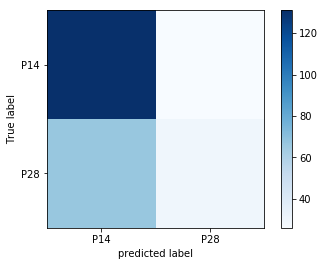

In [44]:
import numpy as np
cmap = plt.cm.Blues

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=['P14', 'P28'],
       yticklabels=['P14','P28'], ylabel='True label', xlabel='predicted label')

Feature ranking:
1. feature 18 (0.714130)
2. feature 17 (0.039205)
3. feature 16 (0.025468)
4. feature 14 (0.024769)
5. feature 19 (0.024250)
6. feature 13 (0.023341)
7. feature 15 (0.021895)
8. feature 11 (0.017455)
9. feature 9 (0.016495)
10. feature 12 (0.014161)
11. feature 1 (0.013258)
12. feature 2 (0.011851)
13. feature 10 (0.010370)
14. feature 3 (0.009036)
15. feature 4 (0.008432)
16. feature 7 (0.007168)
17. feature 6 (0.006389)
18. feature 8 (0.005431)
19. feature 0 (0.003544)
20. feature 5 (0.003350)


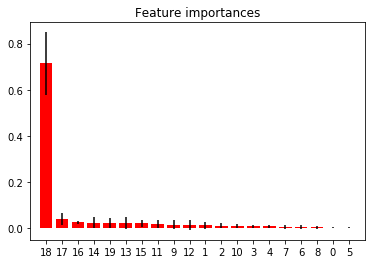

In [30]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature ranking:
1. feature 12 (0.082340)
2. feature 1 (0.078944)
3. feature 11 (0.075687)
4. feature 0 (0.073969)
5. feature 2 (0.073767)
6. feature 8 (0.073249)
7. feature 9 (0.067780)
8. feature 13 (0.066515)
9. feature 6 (0.063909)
10. feature 14 (0.060967)
11. feature 10 (0.059516)
12. feature 4 (0.058677)
13. feature 7 (0.056655)
14. feature 3 (0.055665)
15. feature 5 (0.052358)


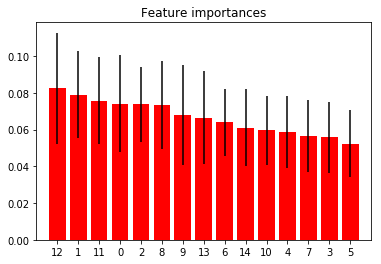

In [42]:
importances = model_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_2.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_2.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_2.shape[1]), indices)
plt.xlim([-1, X_train_2.shape[1]])
plt.show()

In [32]:
print(X_train_2.shape)
X_train_2.iloc[[0],[9,2]]

(1015, 15)


,fractal_dim,kurtosis
145,1.867208,2.049327
